# Compare three images using histograms

The steps to do so:
1. Get the images to compare, swap to RGB
2. Create multi-dim histograms for each of the image
3. Use comparehist - loop over the comparison methods - use for correlation, chi-squared, intersection, hellinger
4. display the result

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob


# make a path to 'Images' directory
image_paths = glob.glob("Images/*.jpg")


# list to store images
histograms = {}
images = {}


# loop through the image paths
for image_path in image_paths:
    filename = image_path.split("/")[-1]
    img_bgr = cv.imread(image_path)
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB) # change the format 
    
    # store image
    images[filename] = img_rgb
    
    # use calcHist for every item in images list
    hist = cv.calcHist(img_rgb, [0,1,2], None, [8,8,8], [0,256,0,256,0,256]) # 3D cube: represent combinations of colours - how often a certain shade of R,G,B appear together 
    hist = cv.normalize(hist, hist).flatten()
    histograms[filename] = hist
    
    
print(histograms.keys())


dict_keys(['doge.jpg', 'cat1.jpg', 'cat2.jpg', 'ER.jpg', 'doro.jpg'])


## Use compareHist to compare the four images

how it works: cv2.compareHist(H1, H2, method)
- H1: first histogram to be comapred
- H2: second histogram
- method: which method used?
    - cv2.HISTCMP_CORREL: Computes the correlation between the two histograms.
    - cv2.HISTCMP_CHISQR: Applies the Chi-Squared distance to the histograms.
    - cv2.HISTCMP_INTERSECT: Calculates the intersection between two histograms.
    - cv2.HISTCMP_BHATTACHARYYA: Bhattacharyya distance, used to measure the “overlap” between the two histograms.

In [ ]:
# let up loop each hist comparisons - to gain a comprehensive understanding!
opencv_methods = (
    ('correlation', cv.HISTCMP_CORREL), # high value -> similar
    ('chi_squared', cv.HISTCMP_CHISQR), # small value -> similar
    ('intersection', cv.HISTCMP_INTERSECT), # high value -> similar
    ('hellinger', cv.HISTCMP_BHATTACHARYYA) # small value -> similar
)

# dictionary to store all results
all_results = {}

# compare each image to 'cat1.jpg' across all methods
target = 'cat1.jpg'
target_hist = histograms[target]

# loop over the dict
for image, hist in histograms.items(): # for each image and its histograms in histograms dictionary:
    method_scores = {}
    
    for (method_name, method) in opencv_methods: # for each img, calc 4 similarity scores and store in a dict
        score = cv.compareHist(target_hist, hist, method) # compare each of the 4 images against cat1.jpg
        method_scores[method_name] = score
        
    all_results[image] = method_scores
        
    
# Optional: print all similarity scores for each image
for image, scores in all_results.items():
    print(f"Results for {image}:")
    for method, score in scores.items():
        print(f"  {method}: {score}")
    print()

Results for doge.jpg:
  correlation: 0.11042734692986447
  chi_squared: 7.35664233384281
  intersection: 0.2078324172180146
  hellinger: 0.8264979689390002

Results for cat1.jpg:
  correlation: 1.0
  chi_squared: 0.0
  intersection: 1.484625664073974
  hellinger: 0.0

Results for cat2.jpg:
  correlation: 0.002658163133725438
  chi_squared: 1.7338528334584553
  intersection: 0.021536907006520778
  hellinger: 0.9667152187581246

Results for ER.jpg:
  correlation: 0.5560470340254137
  chi_squared: 13.091582881884838
  intersection: 0.8029416132485494
  hellinger: 0.5281805005245028

Results for doro.jpg:
  correlation: -0.0029087631056322174
  chi_squared: 1.484625664073974
  intersection: 0.0
  hellinger: 1.0



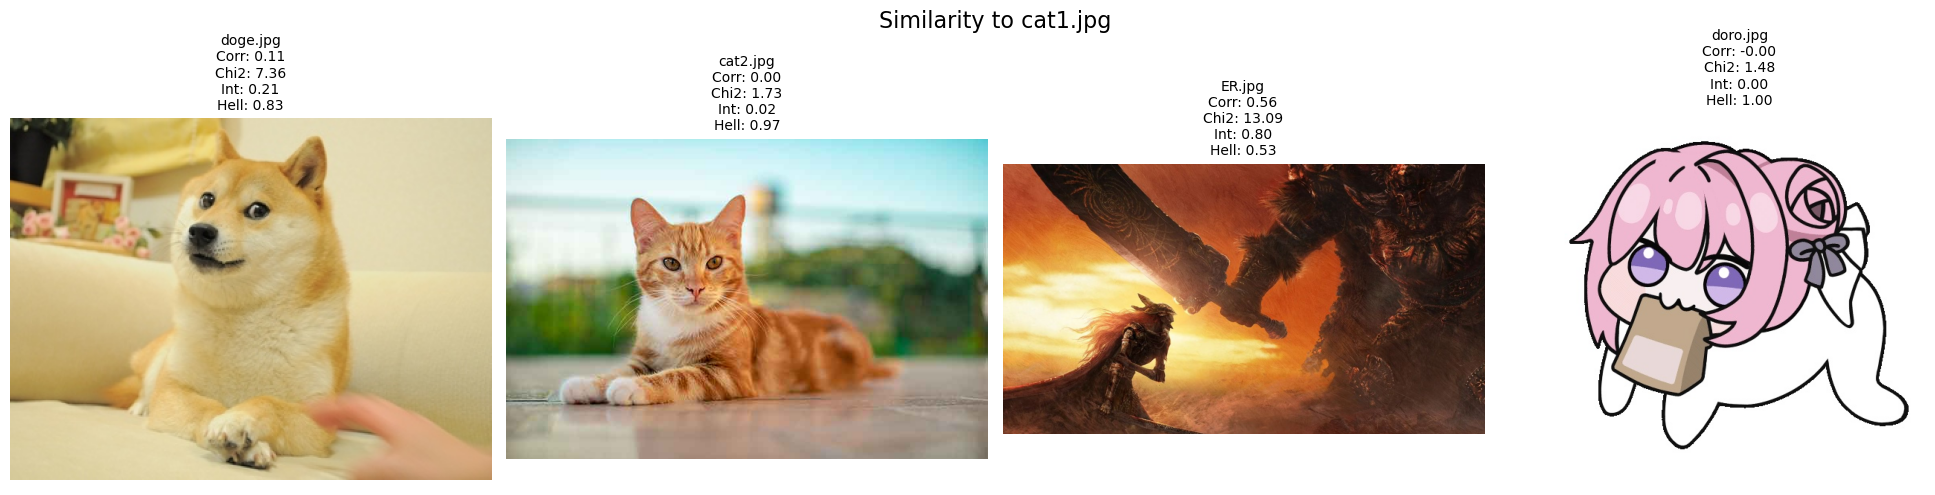

In [18]:
query_image = 'cat1.jpg'

fig, axes = plt.subplots(1, len(all_results)-1, figsize=(20,5))
fig.suptitle(f"Similarity to {query_image}", fontsize=16)

i = 0
for filename, scores in all_results.items():
    if filename == query_image:
        continue # skip that img
    
    # Prepare the image and scores
    img = images[filename]
    title = f"{filename}\n"
    title += f"Corr: {scores['correlation']:.2f}\n"
    title += f"Chi2: {scores['chi_squared']:.2f}\n"
    title += f"Int: {scores['intersection']:.2f}\n"
    title += f"Hell: {scores['hellinger']:.2f}"

    # Show image with title
    axes[i].imshow(img)
    axes[i].set_title(title, fontsize=10)
    axes[i].axis("off")
    i += 1

plt.tight_layout()
plt.show()
    